# **Devoir Maison 1 : Simulations numériques**

## Devoir 2

*Auteurs :*
- *Maxime Cordier*
- *Malo Louboutin*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy.stats import chi2
import pandas as pd

### **Exercice 1** : Loi des grands nombres

### **Partie 1**

1. Ecrire un programme générant N nombres aléatoires pour une loi discrète et une loi continue. Représenter graphiquement des séquences de nombres en faisant varier N.
2. Ecrire un programme représentant la séquence par un histogramme pour chaque N. Puis augmenter N. Que constatez vous?
3. Ecrire un programme utilisant le test du Chi2 pour caractériser ces séquences générées.

Pour la loi discrète on choisi une **loi uniforme**. Pour générer des nombres suivant une distribution uniforme nous pouvons utiliser un générateur congruentiel linéaire.

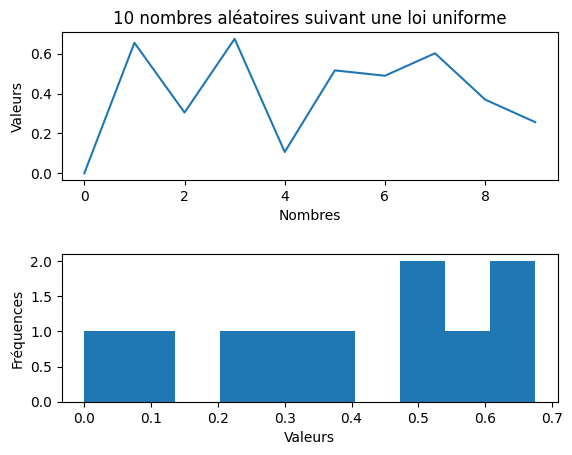

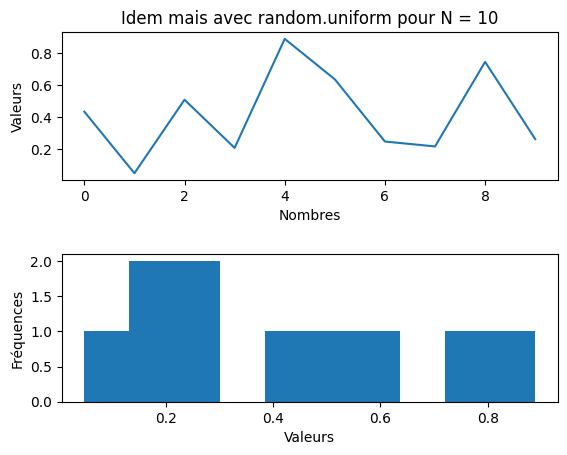

D2 = 10.976888622304706
limite du chi2 = 16.918977604620448
La valeur de D² est inférieure à la valeur critique. Les nombres généré suivent bien une loi uniforme.


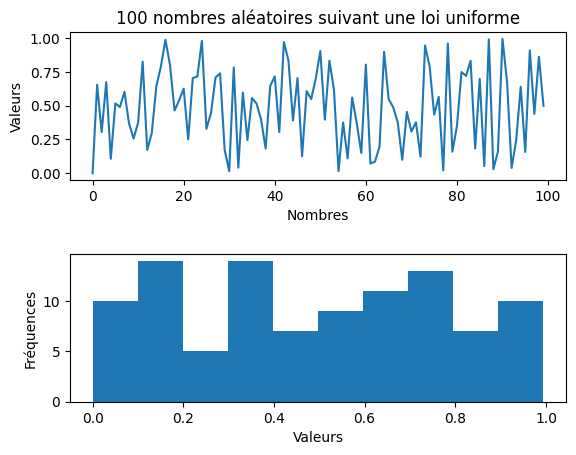

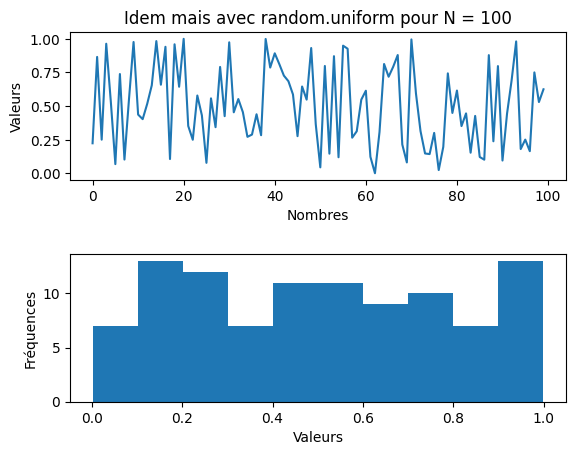

D2 = 90.67142628998249
limite du chi2 = 123.2252214533618
La valeur de D² est inférieure à la valeur critique. Les nombres généré suivent bien une loi uniforme.


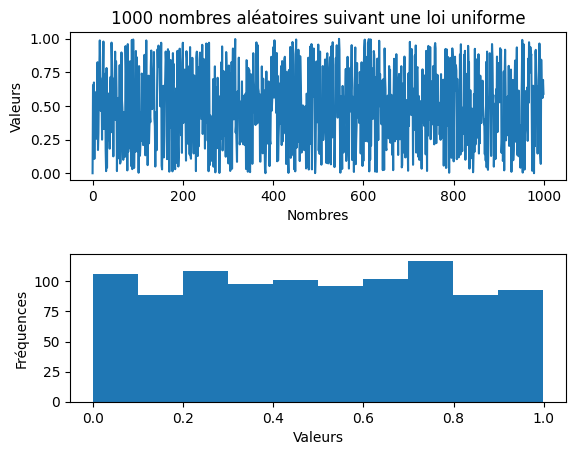

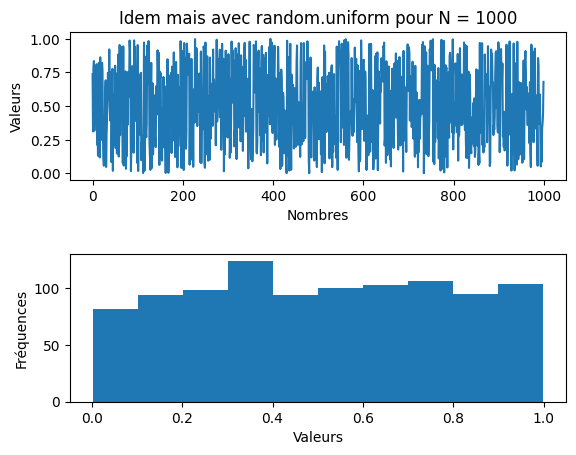

D2 = 1988.7615169336977
limite du chi2 = 1073.6426506574246
La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi uniforme.


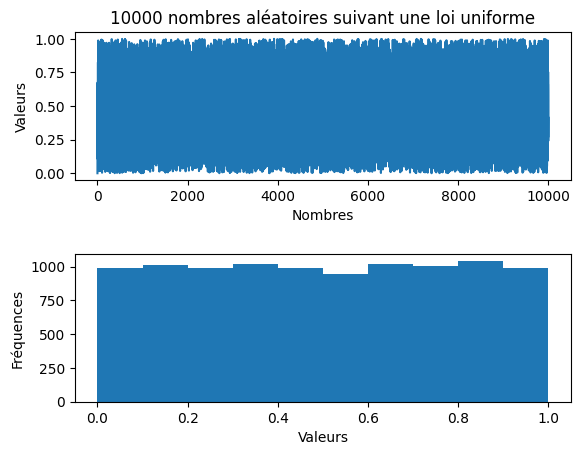

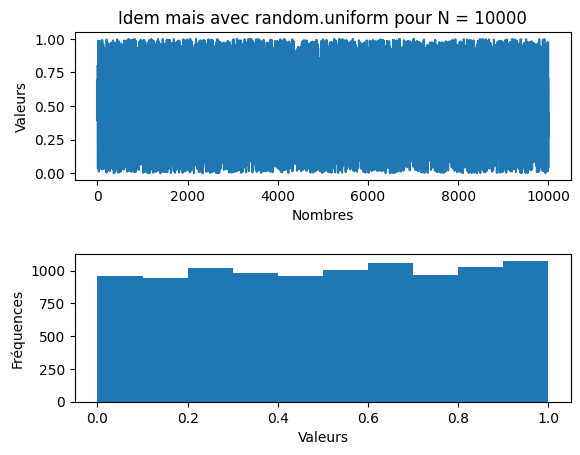

D2 = 26369.254713025148
limite du chi2 = 10232.737266236883
La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi uniforme.


In [2]:
# Générateur congruentiel linéaire
def gen_congruentiel(x, n ,a=1103515245, m= 2**31, c=12345):
    for i in range(1, n):
        x.append((a * x[i-1] + c) % m)
    for i in range(len(x)):
        x[i] = x[i] / m
    return x

# Nombre de valeurs aléatoires générées. 
N = [10, 100, 1000, 10000]

#### AVEC le générateur congruentiel linéaire ####
for n in N:
    X = []
    X = [12345]
    X = gen_congruentiel(X, n) # Génération des nombres aléatoires suivant une loi uniforme

    # Affichage des résultats
    fig, axs = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.5)
    axs[0].plot(X, label="N = " + str(n))
    axs[0].set_title( str(n)+ " nombres aléatoires suivant une loi uniforme")
    axs[0].set_xlabel("Nombres")
    axs[0].set_ylabel("Valeurs")
    axs[1].hist(X, bins=10)
    axs[1].set_xlabel("Valeurs")
    axs[1].set_ylabel("Fréquences")
    plt.savefig("./Images/Partie1.1/loi_uniforme_" + str(n) + ".png")
    plt.show()


    #### AVEC random.uniform ####
    # génération des nombres aléatoires suivant une loi uniforme via random.uniform
    random_numbers = [random.uniform(0, 1) for _ in range(n)]

    # affichage des résultats
    fig, axs = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.5)
    axs[0].plot(random_numbers, label="N = " + str(n))
    axs[0].set_title( "Idem mais avec random.uniform pour N = " + str(n))
    axs[0].set_xlabel("Nombres")
    axs[0].set_ylabel("Valeurs")
    axs[1].hist(random_numbers, bins=10)
    axs[1].set_xlabel("Valeurs")
    axs[1].set_ylabel("Fréquences")
    plt.show()

    #### Test du Chi2 ####
    D2 = 0
    for i in range(n):
        D2 += ((X[i]-random_numbers[i])**2 / random_numbers[i])
    
    print("D2 = "+str(D2))

    degre_liberte = n-1
    niveau_signification = 0.05  # Niveau de signification de 5% (valeur arbitraire)

    valeur_critique = chi2.ppf(1 - niveau_signification, degre_liberte)
    print("limite du chi2 = "+str(valeur_critique))
    
    if D2 > valeur_critique:
        print("La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi uniforme.")
    else:
        print("La valeur de D² est inférieure à la valeur critique. Les nombres généré suivent bien une loi uniforme.")

    


Pour la loi continue, on choisie la loi **exponentielle**. Pour obtenir des nombres aléatoires suivant une distribution exponentielle, nous pouvons utiliser la fonction inverse de la fonction de répartition.

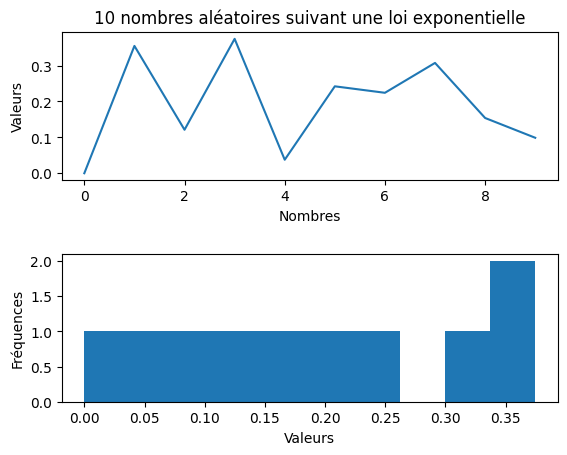

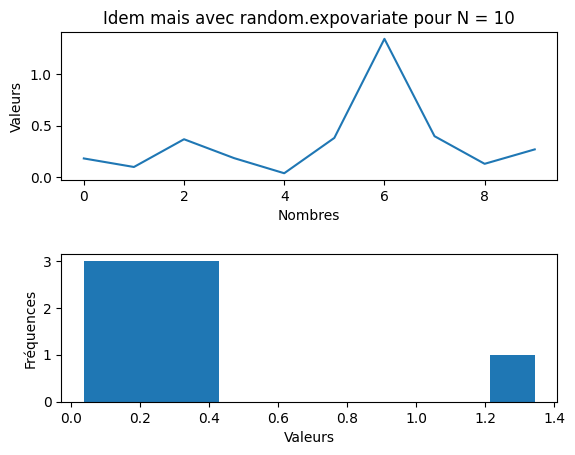

D2 = 2.326418734151897
limite du chi2 = 16.918977604620448
La valeur de D² est inférieure à la valeur critique. Les nombres généré suivent bien une loi exponentielle.


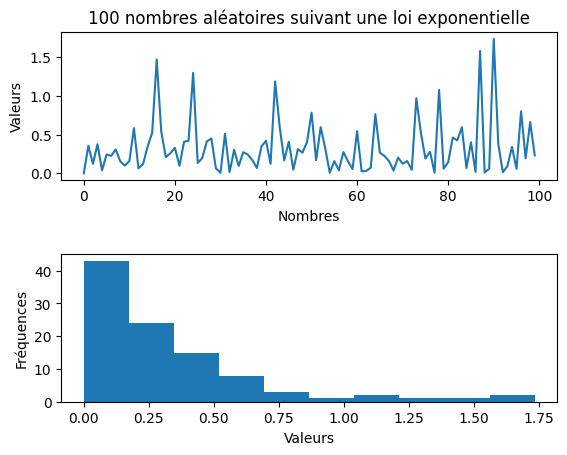

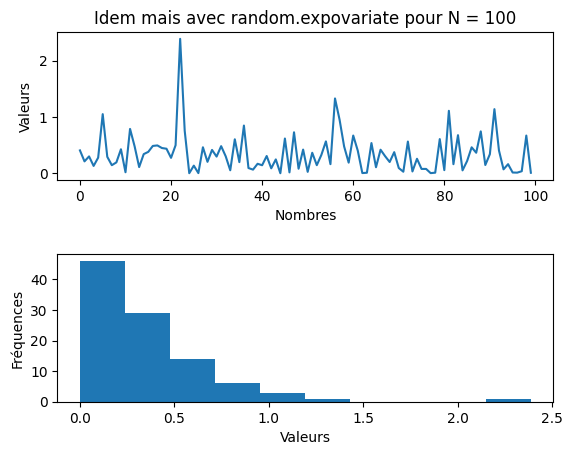

D2 = 967.2512278846009
limite du chi2 = 123.2252214533618
La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi exponentielle.


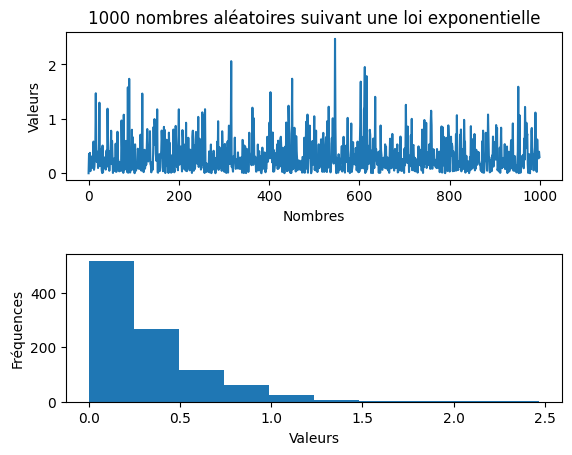

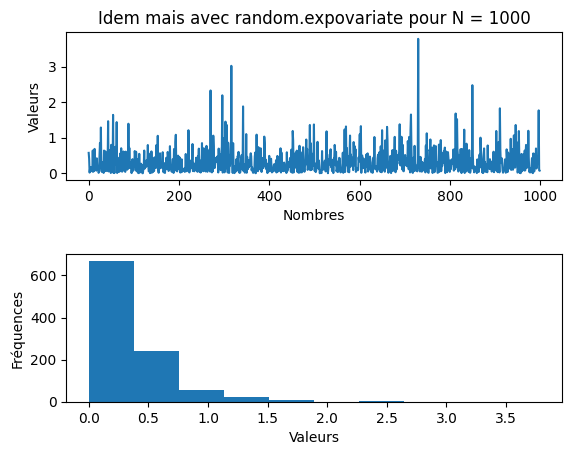

D2 = 31615.171703538952
limite du chi2 = 1073.6426506574246
La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi exponentielle.


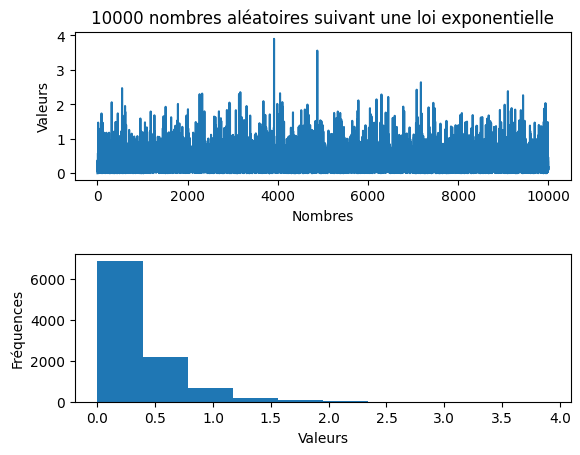

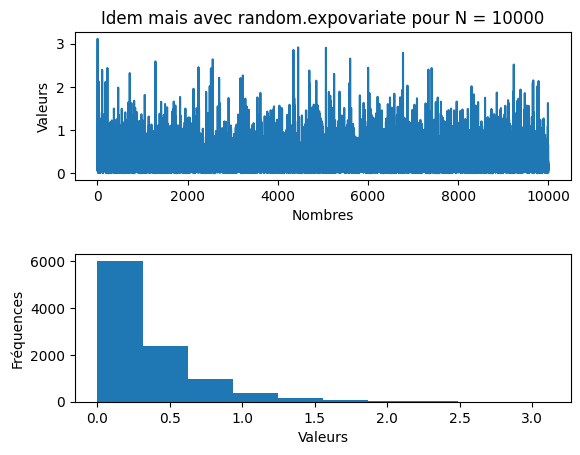

D2 = 44718.190338125256
limite du chi2 = 10232.737266236883
La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi exponentielle.


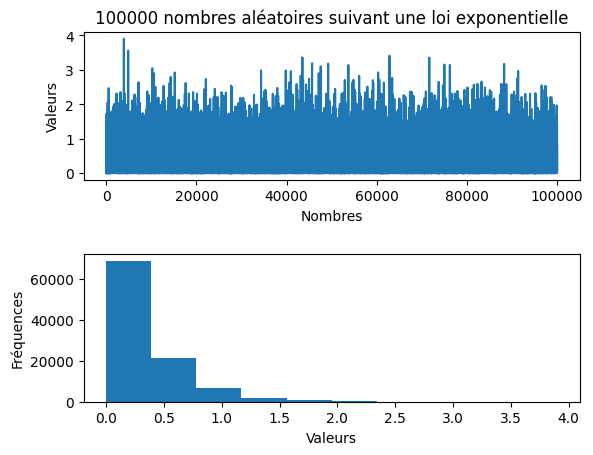

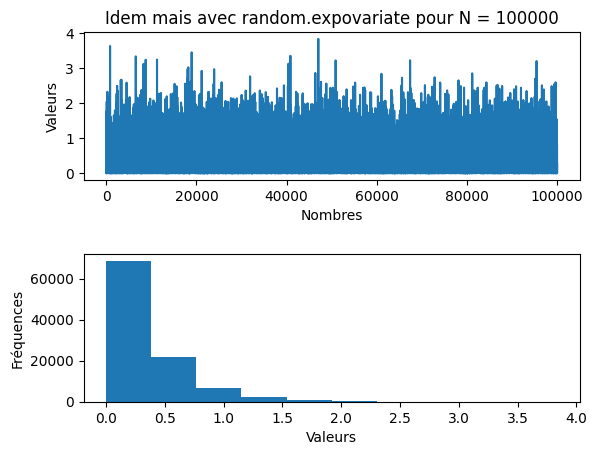

D2 = 615132.1903582641
limite du chi2 = 100735.7324992965
La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi exponentielle.


In [3]:
# Fonction inverse de la fonction de répartition de la loi exponentielle de paramètre lambda
def F_inv(x, lam):
    return (-math.log(1 - x))/lam

N = [10, 100, 1000, 10000, 100000]

for n in N:


    #### AVEC le générateur congruentiel linéaire et la fonction inverse ####
    U = []
    U = [12345]
    U = gen_congruentiel(U,n) # Génération des nombres aléatoires suivant une loi uniforme

    X = []
    for i in range(len(U)):
        X.append(F_inv(U[i], 3)) # Les nombres aléatoires uniformes passent dans la fonction inverse de la loi exponentielle pour former des nombres aléatoires suivant une loi exponentielle
    
    # affichage des résultats
    fig, axs = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.5)
    axs[0].plot(X, label="N = " + str(n))
    axs[0].set_title( str(n)+ " nombres aléatoires suivant une loi exponentielle")
    axs[0].set_xlabel("Nombres")
    axs[0].set_ylabel("Valeurs")
    axs[1].hist(X, bins=10, label="N = " + str(n))
    axs[1].set_xlabel("Valeurs")
    axs[1].set_ylabel("Fréquences")
    plt.savefig("./Images/Partie1.1/loi_exponentielle_" + str(n) + ".png")
    plt.show()


    #### AVEC random.expovariate ####
    # génération des nombres aléatoires suivant une loi exponentielle via random.expovariate
    random_numbers = [random.expovariate(3) for _ in range(n)]

    # affichage des résultats
    fig, axs = plt.subplots(2, 1)
    fig.subplots_adjust(hspace=0.5)
    axs[0].plot(random_numbers, label="N = " + str(n))
    axs[0].set_title( "Idem mais avec random.expovariate pour N = " + str(n))
    axs[0].set_xlabel("Nombres")
    axs[0].set_ylabel("Valeurs")
    axs[1].hist(random_numbers, bins=10, label="N = " + str(n))
    axs[1].set_xlabel("Valeurs")
    axs[1].set_ylabel("Fréquences")
    plt.show()

    #### Test du Chi2 ####
    D2 = 0
    for i in range(n):
        D2 += ((X[i]-random_numbers[i])**2 / random_numbers[i])
    
    print("D2 = "+str(D2))

    degre_liberte = n-1
    niveau_signification = 0.05  # Niveau de signification de 5% (valeur arbitraire)

    valeur_critique = chi2.ppf(1 - niveau_signification, degre_liberte)
    print("limite du chi2 = "+str(valeur_critique))

    if D2 > valeur_critique:
        print("La valeur de D² est supérieure à la valeur critique. Les nombres généré ne suivent pas une loi exponentielle.")
    else:
        print("La valeur de D² est inférieure à la valeur critique. Les nombres généré suivent bien une loi exponentielle.")
    


    

### **Partie 2**

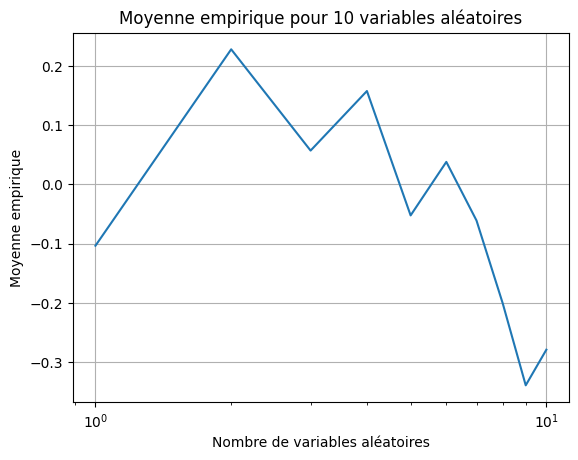

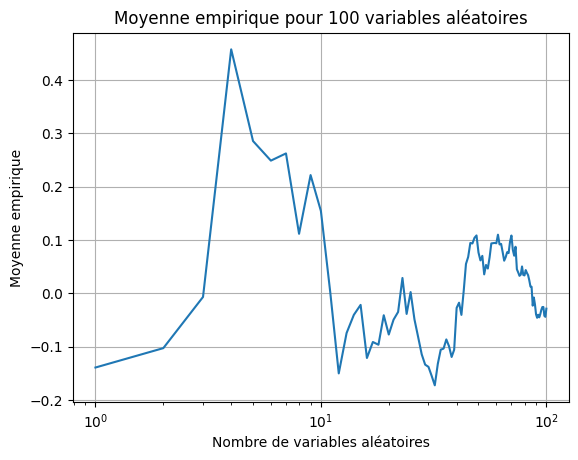

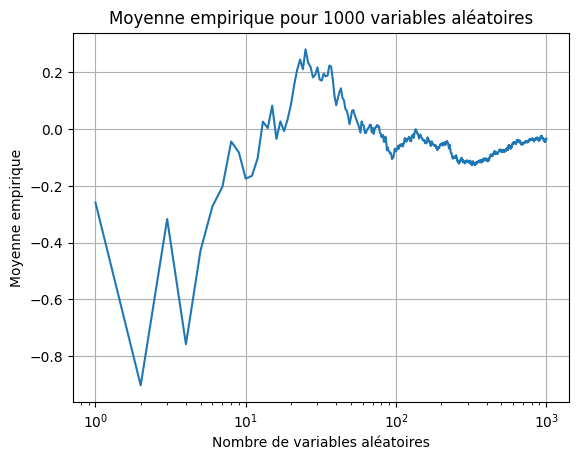

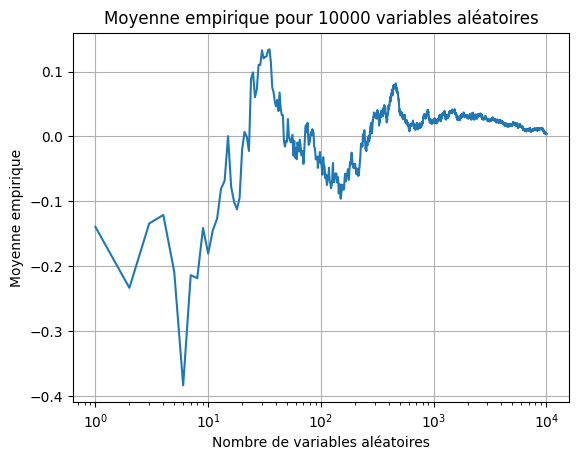

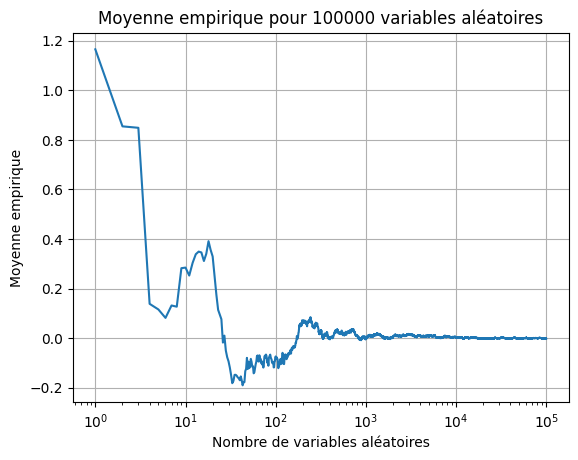

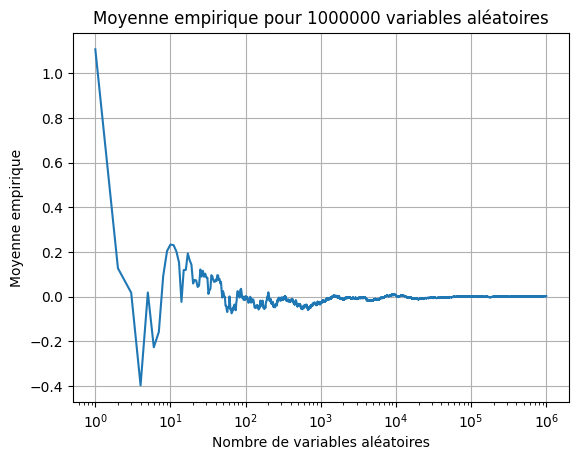

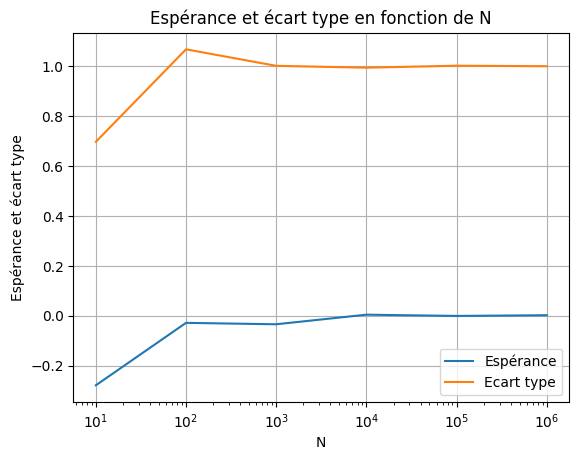

In [4]:
# Générer des données aléatoires
N = [10,100,1000, 10000, 100000, 1000000]  # Nombre de variables aléatoires

#N = np.arange(1, 10000 + 1)

esperances = []
ecarts_types = []

for n in N : 
    X = np.random.randn(n)  # Génération des variables aléatoires Xi

    #Espérance de X
    #print("Espérance de X = " + str(np.mean(X)))
    esperances.append(np.mean(X))

    #Ecart type de X
    #print("Ecart type de X = " + str(np.std(X)))
    ecarts_types.append(np.std(X))

    # Calcul de la moyenne empirique X̄N pour différentes valeurs de N
    Xn = np.cumsum(X) / np.arange(1, n + 1)

    # Tracer le graphique
    plt.plot(np.arange(1, n + 1), Xn)
    plt.xlabel('Nombre de variables aléatoires')
    plt.xscale('log')
    plt.ylabel('Moyenne empirique')
    plt.title('Moyenne empirique pour '+ str(n) + ' variables aléatoires')
    plt.grid(True)
    plt.savefig("./Images/Partie1.2/loi_des_grands_nombres_" + str(n) + ".png")
    plt.show()

# Tracer le graphique de l'espérance et de l'écart type en fonction de N
plt.plot(N, esperances, label="Espérance")
plt.plot(N, ecarts_types, label="Ecart type")
plt.xlabel('N')
plt.xscale('log')
plt.ylabel('Espérance et écart type')
plt.title('Espérance et écart type en fonction de N')
plt.grid(True)
plt.legend()
plt.savefig("./Images/Partie1.2/loi_des_grands_nombres_esp_et_ecart_type.png")
plt.show()